Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


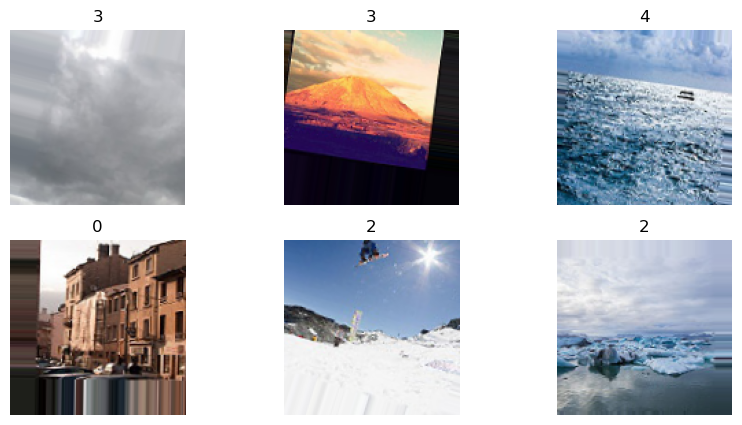

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    "seg_train/seg_train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    "seg_train/seg_train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Visualize some augmented images
x_batch, y_batch = next(train_data)
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))
    plt.axis('off')
plt.show()


In [9]:
model = tf.keras.models.load_model("intel_mobilenetv2.h5")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [10]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_data = val_datagen.flow_from_directory(
    "seg_train/seg_train",  
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 14034 images belonging to 6 classes.


439/439 ━━━━━━━━━━━━━━━━━━━━ 291s 665ms/step
### Classification Report
              precision    recall  f1-score   support

   buildings       0.92      0.92      0.92      2191
      forest       0.99      0.98      0.98      2271
     glacier       0.87      0.76      0.81      2404
    mountain       0.78      0.90      0.84      2512
         sea       0.96      0.92      0.94      2274
      street       0.92      0.95      0.93      2382

    accuracy                           0.90     14034
   macro avg       0.91      0.90      0.90     14034
weighted avg       0.91      0.90      0.90     14034



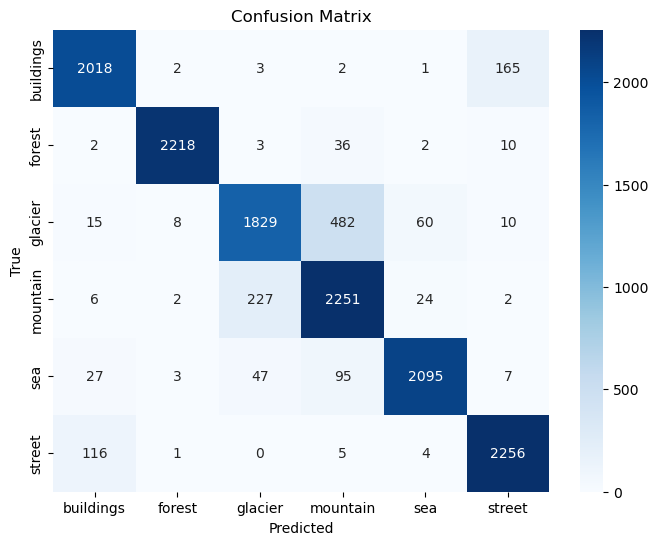

In [13]:
val_data.reset()
y_true = val_data.classes
y_pred_probs = model.predict(val_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

CLASS_NAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

print("### Classification Report")
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
